## SARS-2 Austria 

C. Möstl, Graz, https://twitter.com/chrisoutofspace

data source for Austria
https://orf.at/corona/stories/3157533/

data source for South Korea
https://www.worldometers.info/coronavirus/country/south-korea/

for converting to script on the command line: jupyter nbconvert --to script plot_cases.ipynb

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from sunpy.time import parse_time
import datetime
import set_input_here

import importlib
importlib.reload(set_input_here)
from set_input_here import t_start_string, t_end_string, cases_list, filename, country, south_korea_offset

def expon(x, a, k, b):
    return a*np.exp(k*x) + b

def linear(x, k, b):
    return k*x + b


sns.set_style('darkgrid')
sns.set_context('paper')   

print(country)
print(t_start_string)
print(t_end_string)
print(cases_list)
print(south_korea_offset)

Austria
2020-02-25 23:00
2020-03-21 23:00
[2, 2, 3, 3, 9, 14, 18, 21, 29, 41, 55, 79, 104, 131, 182, 246, 302, 504, 655, 860, 1016, 1332, 1646, 2053, 2388, 2814]
20



### Austria

In [2]:
t_start=parse_time(t_start_string).datetime
t_end=parse_time(t_end_string).datetime

dates=parse_time([t_start + datetime.timedelta(days=1*n) for n in range((t_end - t_start).days+1)]).datetime
cases=np.array(cases_list)

print(parse_time(dates).iso)
print(cases)

dates1=parse_time(dates).plot_date
dates1=dates1-dates1[0] 


#exponential fit
#for morning numbers
#param = scipy.optimize.curve_fit(expon, dates1[0:-2], cases[0:-2] )
#afternoon numbers
param = scipy.optimize.curve_fit(expon, dates1[0:-1], cases[0:-1] )

p1=param[0][0]
p2=param[0][1]
p3=param[0][2]

#linear fit
#paraml = scipy.optimize.curve_fit(linear, dates1[0:-1], cases[0:-1] )
#p1l=paraml[0][0]
#p2l=paraml[0][1]

print()
print(p1,p2,p3)
#print()
#print(p1l,p2l)

t_end2=parse_time('2020-04-10 23:00').datetime

dates_fut=parse_time([t_start + datetime.timedelta(days=n) for n in range((t_end2 - t_start).days)]).plot_date
dates_fut1=dates_fut-dates_fut[0]

fit=expon(dates_fut1,p1,p2,p3)

#fitl=linear(dates_fut1,p1l,p2l)

now=datetime.datetime.utcnow().strftime("%Y-%b-%d %H:%M")
#now=dates[-1].strftime("%Y-%b-%d %H:%M")

['2020-02-25 23:00:00.000' '2020-02-26 23:00:00.000'
 '2020-02-27 23:00:00.000' '2020-02-28 23:00:00.000'
 '2020-02-29 23:00:00.000' '2020-03-01 23:00:00.000'
 '2020-03-02 23:00:00.000' '2020-03-03 23:00:00.000'
 '2020-03-04 23:00:00.000' '2020-03-05 23:00:00.000'
 '2020-03-06 23:00:00.000' '2020-03-07 23:00:00.000'
 '2020-03-08 23:00:00.000' '2020-03-09 23:00:00.000'
 '2020-03-10 23:00:00.000' '2020-03-11 23:00:00.000'
 '2020-03-12 23:00:00.000' '2020-03-13 23:00:00.000'
 '2020-03-14 23:00:00.000' '2020-03-15 23:00:00.000'
 '2020-03-16 23:00:00.000' '2020-03-17 23:00:00.000'
 '2020-03-18 23:00:00.000' '2020-03-19 23:00:00.000'
 '2020-03-20 23:00:00.000' '2020-03-21 23:00:00.000']
[   2    2    3    3    9   14   18   21   29   41   55   79  104  131
  182  246  302  504  655  860 1016 1332 1646 2053 2388 2814]

13.469218146263739 0.21827114115196655 -47.59344333896816


### South Korea

In [3]:
t_start_sk=parse_time('2020-02-15 20:00').datetime
t_end_sk=parse_time('2020-03-18 20:00').datetime

t_start_sk=t_start_sk+datetime.timedelta(days=south_korea_offset)
t_end_sk=t_end_sk+datetime.timedelta(days=south_korea_offset)

dates_sk=parse_time([t_start_sk + datetime.timedelta(days=1*n) for n in range((t_end_sk - t_start_sk).days)]).datetime

print(parse_time(dates_sk).iso)
cases_sk=np.array([28, 29, 30, 31, 58, 111, 209, 436,602, 833, 977, 1261, 1766, 2337,\
                   3150,3736, 4335,5186,5621,6284,6593,7041,7313,7478,7513,7755,7869,\
                   7979,8086,8162,8236,8320])
#print(cases_sk)
#print(len(cases_sk),len(dates_sk))

['2020-03-06 20:00:00.000' '2020-03-07 20:00:00.000'
 '2020-03-08 20:00:00.000' '2020-03-09 20:00:00.000'
 '2020-03-10 20:00:00.000' '2020-03-11 20:00:00.000'
 '2020-03-12 20:00:00.000' '2020-03-13 20:00:00.000'
 '2020-03-14 20:00:00.000' '2020-03-15 20:00:00.000'
 '2020-03-16 20:00:00.000' '2020-03-17 20:00:00.000'
 '2020-03-18 20:00:00.000' '2020-03-19 20:00:00.000'
 '2020-03-20 20:00:00.000' '2020-03-21 20:00:00.000'
 '2020-03-22 20:00:00.000' '2020-03-23 20:00:00.000'
 '2020-03-24 20:00:00.000' '2020-03-25 20:00:00.000'
 '2020-03-26 20:00:00.000' '2020-03-27 20:00:00.000'
 '2020-03-28 20:00:00.000' '2020-03-29 20:00:00.000'
 '2020-03-30 20:00:00.000' '2020-03-31 20:00:00.000'
 '2020-04-01 20:00:00.000' '2020-04-02 20:00:00.000'
 '2020-04-03 20:00:00.000' '2020-04-04 20:00:00.000'
 '2020-04-05 20:00:00.000' '2020-04-06 20:00:00.000']


/Users/chris/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


current total cases Austria 2814


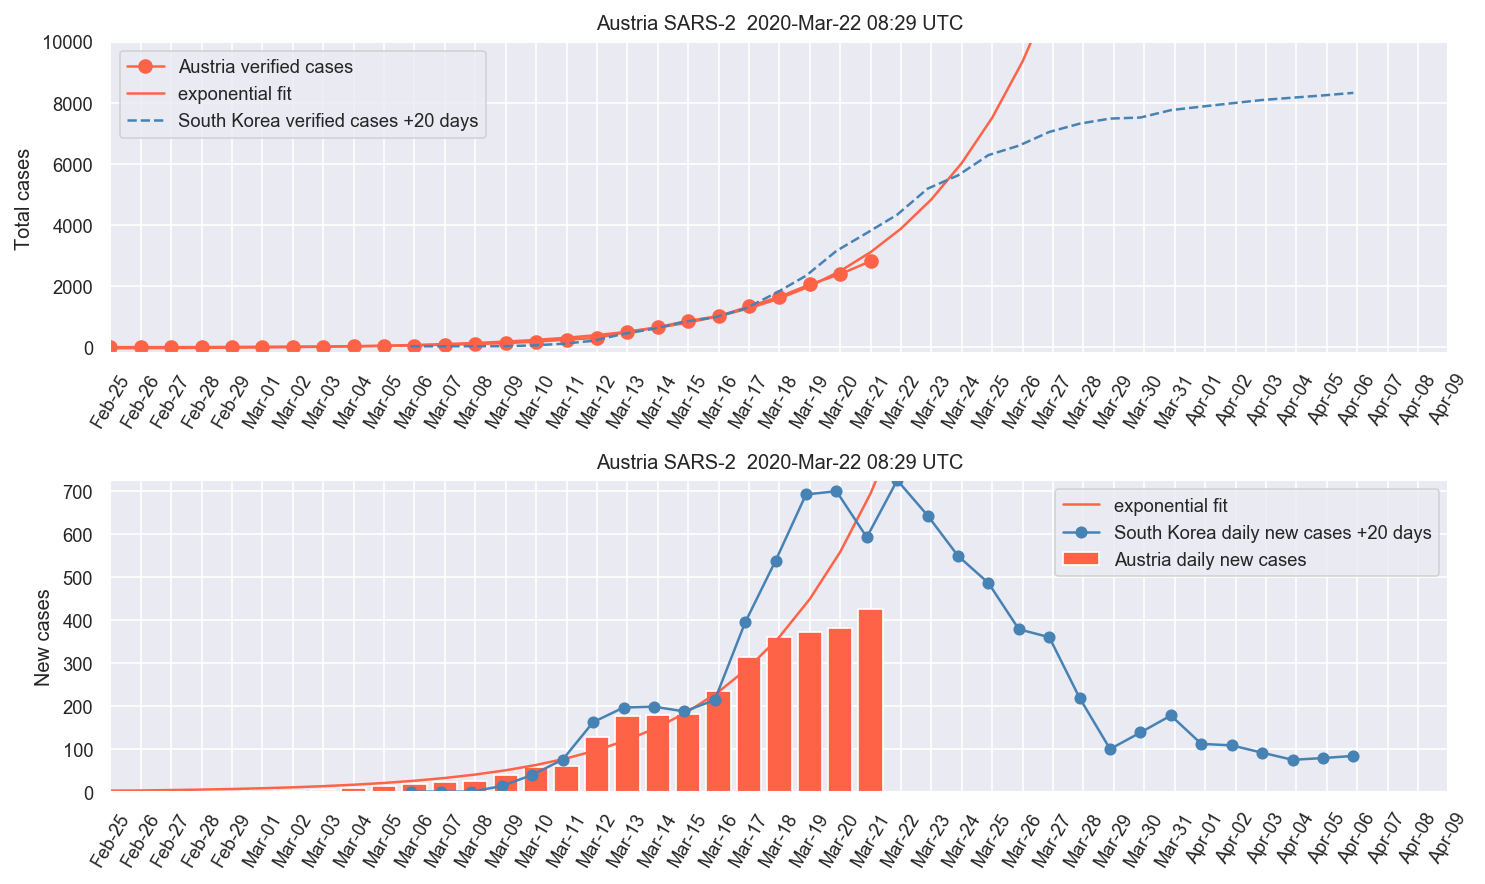

In [4]:
plt.figure(1,figsize=(10,6),dpi=150)
ax1 = plt.subplot(211) 

ax1.plot(dates,cases,marker='o',color='tomato',label=country+' verified cases',markersize=6)
ax1.plot(dates_fut,fit,linestyle='-',color='tomato',label='exponential fit')
#ax2.plot(dates_fut,np.gradient(fitl),color='black',label='linear fit')
ax1.plot(dates_sk,cases_sk,linestyle='--',color='steelblue',label='South Korea verified cases +'+str(south_korea_offset)+' days')


ax1.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )
ax1.set_xlim([dates_fut[0],dates_fut[-1]])
plt.xticks(rotation=60)
plt.ylabel('Total cases')
plt.ylim(-200,10000)
plt.title(country+' SARS-2  '+now+ ' UTC')
plt.legend()
ax1.set_xticks(dates_fut)


ax2 = plt.subplot(212) 

ax2.bar(dates,np.gradient(cases),color='tomato',label=country+' daily new cases')
ax2.plot(dates_fut,np.gradient(fit),color='tomato',label='exponential fit')
ax2.plot(dates_sk,np.gradient(cases_sk),marker='o',color='steelblue',label='South Korea daily new cases +'+str(south_korea_offset)+' days')


ax2.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )

plt.xticks(rotation=60)
plt.ylabel('New cases')
ax2.set_xlim([dates_fut[0],dates_fut[-1]])
plt.title(country+' SARS-2  '+now + ' UTC')
ax2.set_xticks(dates_fut)
plt.ylim(0,np.max(np.gradient(cases_sk)))

plt.legend()

plt.tight_layout()
print('current total cases '+country,cases[-1])

plt.savefig(filename)

/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/Users/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the ear

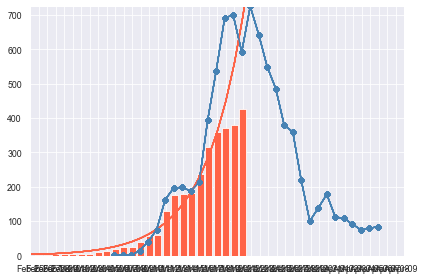

In [12]:
def make_figure(i):

    plt.figure(1,figsize=(10,6),dpi=150)
    ax1 = plt.subplot(211) 

    ax1.plot(dates,cases,marker='o',color='tomato',label=country+' verified cases',markersize=6)
    ax1.plot(dates_fut,fit,linestyle='-',color='tomato',label='exponential fit')
    #ax2.plot(dates_fut,np.gradient(fitl),color='black',label='linear fit')
    ax1.plot(dates_sk,cases_sk,linestyle='--',color='steelblue',label='South Korea verified cases +'+str(south_korea_offset)+' days')


    ax1.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )
    ax1.set_xlim([dates_fut[0],dates_fut[-1]])
    plt.xticks(rotation=60)
    plt.ylabel('Total cases')
    plt.ylim(-200,10000)
    plt.title(country+' SARS-2  '+now+ ' UTC')
    plt.legend()
    ax1.set_xticks(dates_fut)


    ax2 = plt.subplot(212) 

    ax2.bar(dates,np.gradient(cases),color='tomato',label=country+' daily new cases')
    ax2.plot(dates_fut,np.gradient(fit),color='tomato',label='exponential fit')
    ax2.plot(dates_sk,np.gradient(cases_sk),marker='o',color='steelblue',label='South Korea daily new cases +'+str(south_korea_offset)+' days')


    ax2.xaxis.set_major_formatter( matplotlib.dates.DateFormatter('%b-%d') )

    plt.xticks(rotation=60)
    plt.ylabel('New cases')
    ax2.set_xlim([dates_fut[0],dates_fut[-1]])
    plt.title(country+' SARS-2  '+now + ' UTC')
    ax2.set_xticks(dates_fut)
    plt.ylim(0,np.max(np.gradient(cases_sk)))

    plt.legend()

    plt.tight_layout()
    print('current total cases '+country,cases[-1])

    plt.savefig(filename)